In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso, Ridge
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import ElasticNet

from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [85]:
np.set_printoptions(suppress=True)

csvFile = "../data/Boston_house.csv"
df = pd.read_csv(csvFile)
df.head()

,AGE,B,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,MEDV
0,65.2,396.90,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,396.90,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,392.83,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,394.63,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,396.90,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


*** 전처리 과정 중 ***

In [86]:
# CRIM: 해당 지역 내 범죄율
# ZN: 25,000 평방 피트 당 주거용 토지 비율
# INDUS: (소매업이 아닌) 비즈니스용 토지 비율
# RM: 지역 내 주거용 주택의 평균 객실 수

# CHAS: 찰스 강 더미 변수 (통로가 하천을 향하면 1; 그렇지 않으면 0)
# NOX: 산화 질소 농도 (단위 - 천만 분의 1)

# RAD: 고속도로 접근성 지수
# DIS: 가장 가까운 보스턴 고용 센터까지의 거리  

# AGE: 1940년 이전에 건축된 자가주택 건물이 차지하는 비율
# TAX: 10,000 달러 당 부과되는 세금 비율
# PTRATIO:  도시 별 학생-교사 비율

# MEDV: 지억 내 자가주택 매매값의 중앙값 (단위: 천 달러)

# B: 해당 구역에서 흑인이 차지하는 비율 (인종차별적 요소: 제거 요망)
# LSTAT: 수입이 작은 인구가 차지하는 비율 (차별적 요소 가능성: 검토 요망)

In [87]:
# remove B column in the dataframe
df = df.drop(columns=['B'])
df.head()

,AGE,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS,MEDV
0,65.2,6.575,0.00632,4.0900,2.31,4.98,0.538,15.3,1,18.0,296,0,24.0
1,78.9,6.421,0.02731,4.9671,7.07,9.14,0.469,17.8,2,0.0,242,0,21.6
2,61.1,7.185,0.02729,4.9671,7.07,4.03,0.469,17.8,2,0.0,242,0,34.7
3,45.8,6.998,0.03237,6.0622,2.18,2.94,0.458,18.7,3,0.0,222,0,33.4
4,54.2,7.147,0.06905,6.0622,2.18,5.33,0.458,18.7,3,0.0,222,0,36.2


In [88]:
x_train, x_test, y_train, y_test = train_test_split(df.drop('MEDV', axis=1), df['MEDV'], random_state=123)

In [89]:
x_train.shape, x_test.shape

((379, 12), (127, 12))

In [90]:
x_train.head()

,AGE,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
335,34.5,6.037,0.03961,5.9853,5.19,8.01,0.515,20.2,5,0.0,224,0
142,100.0,5.403,3.32105,1.3216,19.58,26.82,0.871,14.7,5,0.0,403,1
170,94.6,5.875,1.20742,2.4259,19.58,14.43,0.605,14.7,5,0.0,403,0
241,65.1,6.095,0.10612,6.3361,4.93,12.40,0.428,16.6,6,30.0,300,0
379,100.0,6.223,17.86670,1.3861,18.10,21.78,0.671,20.2,24,0.0,666,0


In [91]:
y_train.head()

335    21.1
142    13.4
170    17.4
241    20.1
379    10.2
Name: MEDV, dtype: float64

### Seaborn 활용

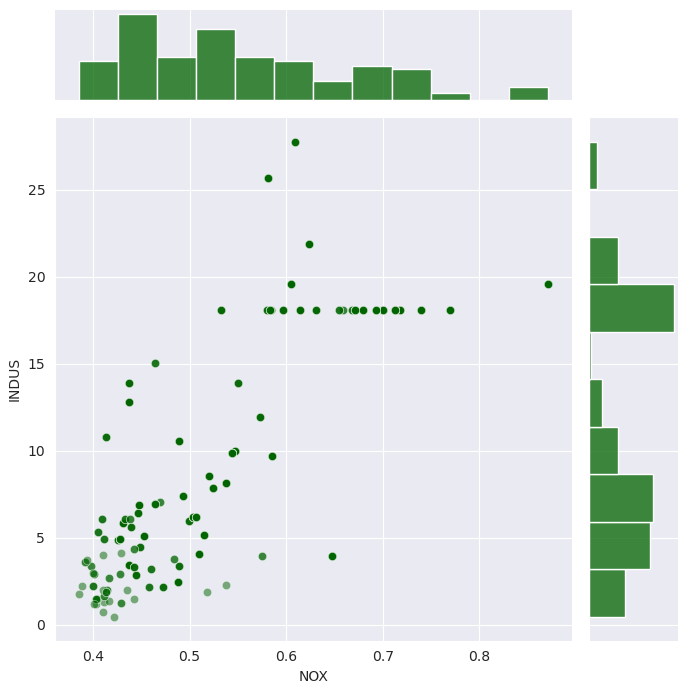

In [153]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df.NOX, 
                y=df.INDUS, 
                # kind='hex', 
                height=7, 
                color='darkgreen',
                joint_kws={'alpha':0.5})
plt.show()

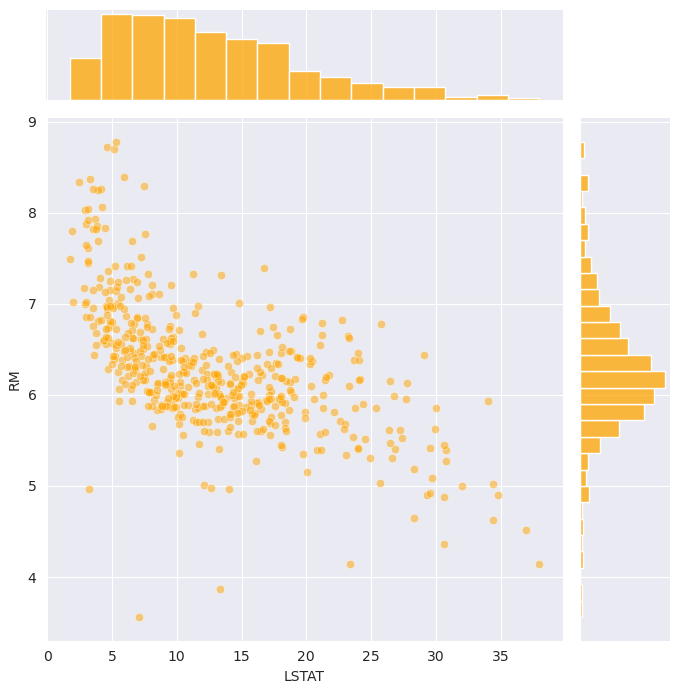

In [154]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df['LSTAT'], 
                y=df['RM'], 
                # kind='hex', 
                height=7, 
                color='orange',
                joint_kws={'alpha':0.5})
plt.show()

### WHERE is the PRICE Column?

In [157]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=df.LSTAT, 
                y=df.PRICE, 
                # kind='hex', 
                height=7, 
                color='crimson',
                joint_kws={'alpha':0.5})
plt.show()

AttributeError: 'DataFrame' object has no attribute 'PRICE'

### 평가 지표 만들어 보기

In [92]:
predict = np.array([3, 4, 5])
actual = np.array([1, 2, 3])

In [93]:
def my_mse(pred, actual):
    return ((pred - actual)**2).mean()

def my_mae(pred, actual):
    return np.abs(pred - actual).mean()

def my_rmse(pred, actual):
    return np.sqrt(my_mse(pred, actual))

my_mse(predict, actual)
my_mae(predict, actual)
my_rmse(predict, actual)

2.0

In [94]:
my_mae(predict, actual), mean_absolute_error(predict, actual)
my_mse(predict, actual), mean_squared_error(predict, actual)

(4.0, 4.0)

In [95]:
my_mse(predict, actual), mean_squared_error(predict, actual)
my_mae(predict, actual), mean_absolute_error(predict, actual)

(2.0, 2.0)

In [96]:
my_predictions = {}

colors = ['r', 'c', 'm', 'y', 'k', 'khaki', 'teal', 'orchid', 'sandybrown',
          'greenyellow', 'dodgerblue', 'deepskyblue', 'rosybrown', 'firebrick',
          'deeppink', 'crimson', 'salmon', 'darkred', 'olivedrab', 'olive',
          'forestgreen', 'royalblue', 'indigo', 'navy', 'mediumpurple', 'chocolate',
          'gold', 'darkorange', 'seagreen', 'turquoise', 'steelblue', 'slategray',
          'peru', 'midnightblue', 'slateblue', 'dimgray', 'cadetblue', 'tomato'
         ]

def plot_predictions(name_, pred, actual):
    df = pd.DataFrame({'prediction': pred, 'actual': y_test})
    df = df.sort_values(by='actual').reset_index(drop=True)

    plt.figure(figsize=(12, 9))
    plt.scatter(df.index, df['prediction'], marker='x', color='r')
    plt.scatter(df.index, df['actual'], alpha=0.7, marker='o', color='black')
    plt.title(name_, fontsize=15)
    plt.legend(['prediction', 'actual'], fontsize=12)
    plt.show()

def mse_eval(name_, pred, actual):
    global predictions
    global colors

    plot_predictions(name_, pred, actual)

    mse = mean_squared_error(pred, actual)
    my_predictions[name_] = mse

    y_value = sorted(my_predictions.items(), key=lambda x: x[1], reverse=True)

    df = pd.DataFrame(y_value, columns=['model', 'mse'])
    print(df)
    min_ = df['mse'].min() - 10
    max_ = df['mse'].max() + 10

    length = len(df)

    plt.figure(figsize=(10, length))
    ax = plt.subplot()
    ax.set_yticks(np.arange(len(df)))
    ax.set_yticklabels(df['model'], fontsize=15)
    bars = ax.barh(np.arange(len(df)), df['mse'])

    for i, v in enumerate(df['mse']):
        idx = np.random.choice(len(colors))
        bars[i].set_color(colors[idx])
        ax.text(v + 2, i, str(round(v, 3)), color='k', fontsize=15, fontweight='bold')

    plt.title('MSE Error', fontsize=18)
    plt.xlim(min_, max_)

    plt.show()

def remove_model(name_):
    global my_predictions
    try:
        del my_predictions[name_]
    except KeyError:
        return False
    return True

## LinearRegression

In [97]:
# 해당 작업에 CPU 개수 할당 (-1은 모든 가용 CPU)
model = LinearRegression(n_jobs=1)

In [98]:
model.fit(x_train, y_train)

LinearRegression(n_jobs=1)

In [99]:
pred = model.predict(x_test)

In [100]:
print(model.coef_)
print(model.intercept_)

[  0.00217337   4.26173329  -0.09942221  -1.38585003   0.05349876
  -0.57222313 -16.16684381  -0.91997595   0.26106034   0.04285437
  -0.01253439   1.42291575]
35.848518925632504


In [ ]:
mse_eval('LinearRegression', pred, y_test)

In [102]:
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

In [ ]:
for alpha in alphas:
    ridge = Ridge(alpha=alpha)
    ridge.fit(x_train, y_train)
    pred = ridge.predict(x_test)
    mse_eval('Ridge(alpha={})'.format(alpha), pred, y_test)

In [104]:
x_train.columns

Index(['AGE', 'RM', 'CRIM', 'DIS', 'INDUS', 'LSTAT', 'NOX', 'PTRATIO', 'RAD',
       'ZN', 'TAX', 'CHAS'],
      dtype='object')

In [105]:
ridge.coef_

array([  0.00217214,   4.2617483 ,  -0.09942158,  -1.38582856,
         0.0534932 ,  -0.57222507, -16.16542676,  -0.91996021,
         0.26105616,   0.04285444,  -0.01253448,   1.42288257])

In [106]:
def plot_coef(columns, coef):
    coef_df = pd.DataFrame(list(zip(columns, coef)))
    coef_df.columns=['feature', 'coef']
    coef_df = coef_df.sort_values('coef', ascending=False).reset_index(drop=True)

    fig, ax = plt.subplots(figsize=(9, 7))
    ax.barh(np.arange(len(coef_df)), coef_df['coef'])
    idx = np.arange(len(coef_df))
    ax.set_yticks(idx)
    ax.set_yticklabels(coef_df['feature'])
    fig.tight_layout()
    plt.show()

In [ ]:
plot_coef(x_train.columns, ridge.coef_)

In [108]:
ridge_100 = Ridge(alpha=100)
ridge_100.fit(x_train, y_train)
ridge_pred_100 = ridge_100.predict(x_test)

ridge_001 = Ridge(alpha=0.001)
ridge_001.fit(x_train, y_train)
ridge_pred_001 = ridge_001.predict(x_test)

In [ ]:
plot_coef(x_train.columns, ridge_100.coef_)

In [ ]:
plot_coef(x_train.columns, ridge_001.coef_)

In [111]:
# 값이 커질 수록 큰 규제입니다.
# alpha값이 커질수록 직선에 가까워진다.
alphas = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001]

In [ ]:
for alpha in alphas:
    lasso = Lasso(alpha=alpha)
    lasso.fit(x_train, y_train)
    pred = lasso.predict(x_test)
    mse_eval('Lasso(alpha={})'.format(alpha), pred, y_test)

In [113]:
lasso_100 = Lasso(alpha=100)
lasso_100.fit(x_train, y_train)
lasso_pred_100 = lasso_100.predict(x_test)

lasso_001 = Lasso(alpha=0.001)
lasso_001.fit(x_train, y_train)
lasso_pred_001 = lasso_001.predict(x_test)

In [ ]:
plot_coef(x_train.columns, lasso_100.coef_)

In [115]:
lasso_100.coef_

array([-0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        , -0.        , -0.        ,  0.        ,
       -0.02354321,  0.        ])

In [ ]:
plot_coef(x_train.columns, lasso_001.coef_)

In [117]:
lasso_001.coef_

array([  0.00191661,   4.26356299,  -0.09926226,  -1.38028149,
         0.05213778,  -0.5728365 , -15.82176566,  -0.91622598,
         0.26008744,   0.04286687,  -0.01256019,   1.39883097])

In [118]:
# ratios가 수식의 r이다.
ratios = [0.2, 0.5, 0.8]

In [ ]:
for ratio in ratios:
    elasticnet = ElasticNet(alpha=0.5, l1_ratio=ratio)
    elasticnet.fit(x_train, y_train)
    pred = elasticnet.predict(x_test)
    mse_eval('ElasticNet(l1_ratio={})'.format(ratio), pred, y_test)

In [120]:
elsticnet_20 = ElasticNet(alpha=5, l1_ratio=0.2)
elsticnet_20.fit(x_train, y_train)
elasticnet_pred_20 = elsticnet_20.predict(x_test)

elsticnet_80 = ElasticNet(alpha=5, l1_ratio=0.8)
elsticnet_80.fit(x_train, y_train)
elasticnet_pred_80 = elsticnet_80.predict(x_test)

In [ ]:
plot_coef(x_train.columns, elsticnet_20.coef_)

In [ ]:
plot_coef(x_train.columns, elsticnet_80.coef_)

In [123]:
elsticnet_80.coef_

array([ 0.03771726,  0.        , -0.        , -0.        , -0.        ,
       -0.78956922,  0.        , -0.        ,  0.        ,  0.03557061,
       -0.00934922,  0.        ])

## Scaler

In [124]:
x_train.describe()

,AGE,RM,CRIM,DIS,INDUS,LSTAT,NOX,PTRATIO,RAD,ZN,TAX,CHAS
count,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000,379.000000
mean,68.588391,6.283594,3.613106,3.776124,11.167520,12.770158,0.554760,18.455409,9.461741,10.757256,406.282322,0.060686
std,28.200508,0.713708,9.010515,2.106978,6.875301,7.182040,0.115683,2.140141,8.599279,22.412656,168.267430,0.239069
min,6.000000,3.561000,0.013010,1.169100,0.460000,1.730000,0.392000,12.600000,1.000000,0.000000,187.000000,0.000000
25%,43.900000,5.890000,0.082325,2.100350,5.190000,7.130000,0.453000,17.400000,4.000000,0.000000,279.000000,0.000000
50%,77.300000,6.195000,0.253560,3.102500,9.690000,11.450000,0.538000,19.000000,5.000000,0.000000,330.000000,0.000000
75%,93.700000,6.618500,3.630895,5.116700,18.100000,17.115000,0.624000,20.200000,24.000000,12.500000,666.000000,0.000000
max,100.000000,8.725000,88.976200,12.126500,27.740000,36.980000,0.871000,22.000000,24.000000,100.000000,711.000000,1.000000


### StandardScaler

평균(mean)을 0, 표준편차(std)를 1로 만들어 주는 스케일러

In [125]:
std_scaler = StandardScaler()
std_scaled = std_scaler.fit_transform(x_train)

In [127]:
round(pd.DataFrame(std_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,-0.00,0.00,0.00,-0.00,0.00,0.00,-0.00,0.00,-0.00,0.00,0.00,0.00
std,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00
min,-2.22,-3.82,-0.40,-1.24,-1.56,-1.54,-1.41,-2.74,-0.99,-0.48,-1.30,-0.25
25%,-0.88,-0.55,-0.39,-0.80,-0.87,-0.79,-0.88,-0.49,-0.64,-0.48,-0.76,-0.25
50%,0.31,-0.12,-0.37,-0.32,-0.22,-0.18,-0.15,0.25,-0.52,-0.48,-0.45,-0.25
75%,0.89,0.47,0.00,0.64,1.01,0.61,0.60,0.82,1.69,0.08,1.55,-0.25
max,1.12,3.43,9.49,3.97,2.41,3.38,2.74,1.66,1.69,3.99,1.81,3.93


### MinMaxScaler

min값과 max값을 0~1사이로 정규화

In [128]:
minmax_scaler = MinMaxScaler()
minmax_scaled = minmax_scaler.fit_transform(x_train)

In [129]:
round(pd.DataFrame(minmax_scaled).describe(), 2)

,0,1,2,3,4,5,6,7,8,9,10,11
count,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00,379.00
mean,0.67,0.53,0.04,0.24,0.39,0.31,0.34,0.62,0.37,0.11,0.42,0.06
std,0.30,0.14,0.10,0.19,0.25,0.20,0.24,0.23,0.37,0.22,0.32,0.24
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.40,0.45,0.00,0.08,0.17,0.15,0.13,0.51,0.13,0.00,0.18,0.00
50%,0.76,0.51,0.00,0.18,0.34,0.28,0.30,0.68,0.17,0.00,0.27,0.00
75%,0.93,0.59,0.04,0.36,0.65,0.44,0.48,0.81,1.00,0.12,0.91,0.00
max,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


### RobustScaler

In [130]:
robust_scaler = RobustScaler()
robust_scaled = robust_scaler.fit_transform(x_train)

In [131]:
round(pd.DataFrame(robust_scaled).median(), 2)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     0.0
8     0.0
9     0.0
10    0.0
11    0.0
dtype: float64

### Pipeline

In [132]:
elasticnet_pipeline = make_pipeline(
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [133]:
elasticnet_pred = elasticnet_pipeline.fit(x_train, y_train).predict(x_test)

In [ ]:
mse_eval('Standard ElasticNet', elasticnet_pred, y_test)

In [ ]:
elasticnet_no_pipeline = ElasticNet(alpha=0.1, l1_ratio=0.2)
no_pipeline_pred = elasticnet_no_pipeline.fit(x_train, y_train).predict(x_test)
mse_eval('No Standard ElasticNet', elasticnet_pred, y_test)

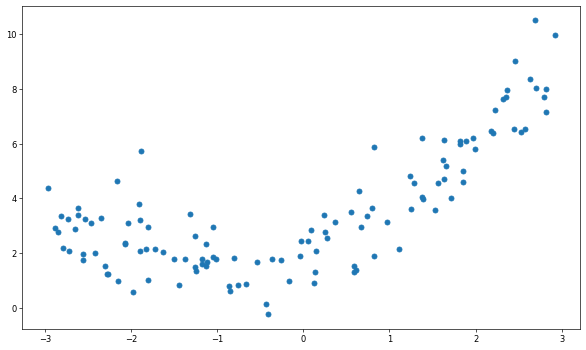

In [136]:
m = 120
np.random.seed(42)

# -3 ~ 3 범위의 실수값을 생성
# rand함수는 0~1사이의 실수값을 생성한다.

X = 6 * np.random.rand(m,1) - 3
y = 0.5*X**2 + X + 2 + np.random.randn(m,1)
plt.figure(figsize=(12,7), dpi=60)
plt.scatter(X, y)

In [137]:
# 위의 데이터를 PolynominalFeatures를 사용해 훈련 데이터를 변환해보자.
# PolynomialFeatures의 degree 값이 다항의 차수를 정의한다.
# degree=2이면 2차, 3이면 3차이다.

poly_features = PolynomialFeatures(degree=3, include_bias=False)
X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [138]:
# X_poly는 제곱의 특성값(Feature)을 추가로 갖는다.
# X, X**2
X_poly[0]

array([-0.75275929,  0.56664654, -0.42654845])

In [139]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([2.07417096]), array([[0.89094457, 0.49503308, 0.01293085]]))

In [140]:
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "training_linear_models"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

그림 저장: quadratic_predictions_plot


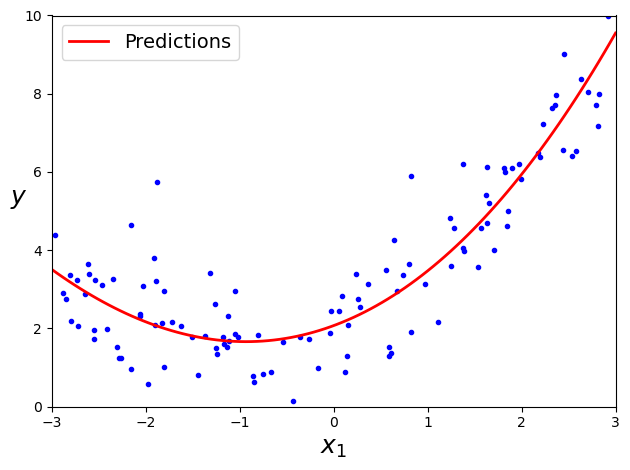

In [141]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("그림 저장:", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)

plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])

save_fig("quadratic_predictions_plot")
plt.show()

In [142]:
# 성능이 좋지만 검증 점수가 나쁘다면 모델이 과대적합된 것이고,  
# 양쪽 모두 좋지 않으면 과소적합이다.

그림 저장: high_degree_polynomials_plot


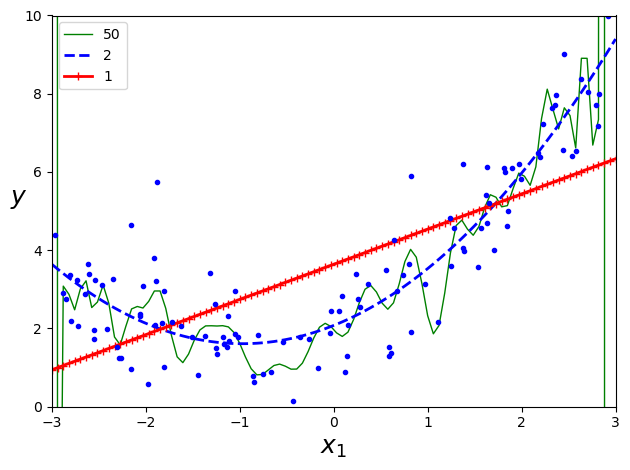

In [152]:
from sklearn.preprocessing import StandardScaler

for style, width, degree in (("g-", 1, 50), ("b--", 2, 2), ("r-+", 2, 1)):
    polybig_features = PolynomialFeatures(degree=degree, include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
            ("poly_features", polybig_features),
            ("std_scaler", std_scaler),
            ("lin_reg", lin_reg),
        ])
    polynomial_regression.fit(X, y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new, y_newbig, style, label=str(degree), linewidth=width)

plt.plot(X, y, "b.", linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

save_fig("high_degree_polynomials_plot")
plt.show()

In [145]:
poly = PolynomialFeatures(degree=2, include_bias=False)

In [146]:
poly_features = poly.fit_transform(x_train)[0]

In [147]:
poly_features

array([   34.5       ,     6.037     ,     0.03961   ,     5.9853    ,
           5.19      ,     8.01      ,     0.515     ,    20.2       ,
           5.        ,     0.        ,   224.        ,     0.        ,
        1190.25      ,   208.2765    ,     1.366545  ,   206.49285   ,
         179.055     ,   276.345     ,    17.7675    ,   696.9       ,
         172.5       ,     0.        ,  7728.        ,     0.        ,
          36.445369  ,     0.23912557,    36.1332561 ,    31.33203   ,
          48.35637   ,     3.109055  ,   121.9474    ,    30.185     ,
           0.        ,  1352.288     ,     0.        ,     0.00156895,
           0.23707773,     0.2055759 ,     0.3172761 ,     0.02039915,
           0.800122  ,     0.19805   ,     0.        ,     8.87264   ,
           0.        ,    35.82381609,    31.063707  ,    47.942253  ,
           3.0824295 ,   120.90306   ,    29.9265    ,     0.        ,
        1340.7072    ,     0.        ,    26.9361    ,    41.5719    ,
      

In [148]:
x_train.iloc[0]

AGE         34.50000
RM           6.03700
CRIM         0.03961
DIS          5.98530
INDUS        5.19000
LSTAT        8.01000
NOX          0.51500
PTRATIO     20.20000
RAD          5.00000
ZN           0.00000
TAX        224.00000
CHAS         0.00000
Name: 335, dtype: float64

In [149]:
poly_pipeline = make_pipeline(
    PolynomialFeatures(degree=2, include_bias=False),
    StandardScaler(),
    ElasticNet(alpha=0.1, l1_ratio=0.2)
)

In [150]:
poly_pred = poly_pipeline.fit(x_train, y_train).predict(x_test)

c:\Cookiebake\envs\Walter\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:647: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 2.889e+01, tolerance: 3.268e+00
  model = cd_fast.enet_coordinate_descent(


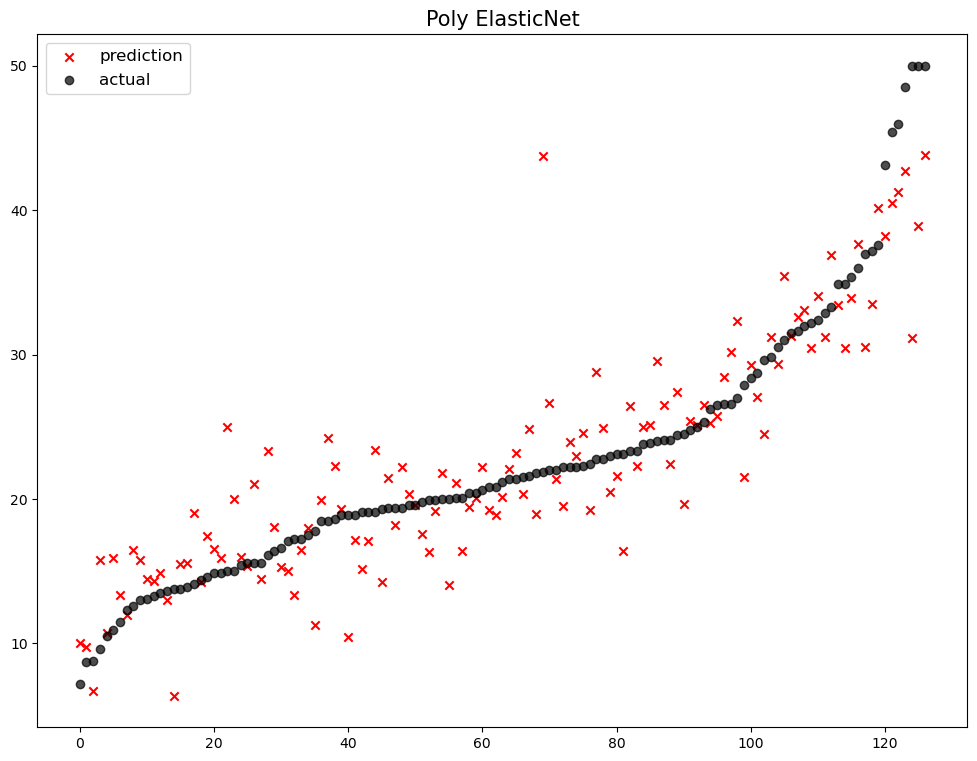

                       model        mse
0           Lasso(alpha=100)  66.472665
1            Lasso(alpha=10)  39.878755
2           Lasso(alpha=0.1)  28.751282
3             Lasso(alpha=1)  28.410700
4   ElasticNet(l1_ratio=0.8)  27.697251
5            Ridge(alpha=10)  27.644604
6   ElasticNet(l1_ratio=0.5)  27.446140
7   ElasticNet(l1_ratio=0.2)  27.282678
8           Ridge(alpha=100)  27.053920
9             Ridge(alpha=1)  26.746239
10       Standard ElasticNet  26.530587
11    No Standard ElasticNet  26.530587
12         Lasso(alpha=0.01)  26.361202
13          Ridge(alpha=0.1)  26.072004
14        Lasso(alpha=0.001)  25.998447
15         Ridge(alpha=0.01)  25.973909
16       Lasso(alpha=0.0001)  25.966188
17        Ridge(alpha=0.001)  25.963778
18       Ridge(alpha=0.0001)  25.962761
19          LinearRegression  25.962649
20           Poly ElasticNet  18.637901


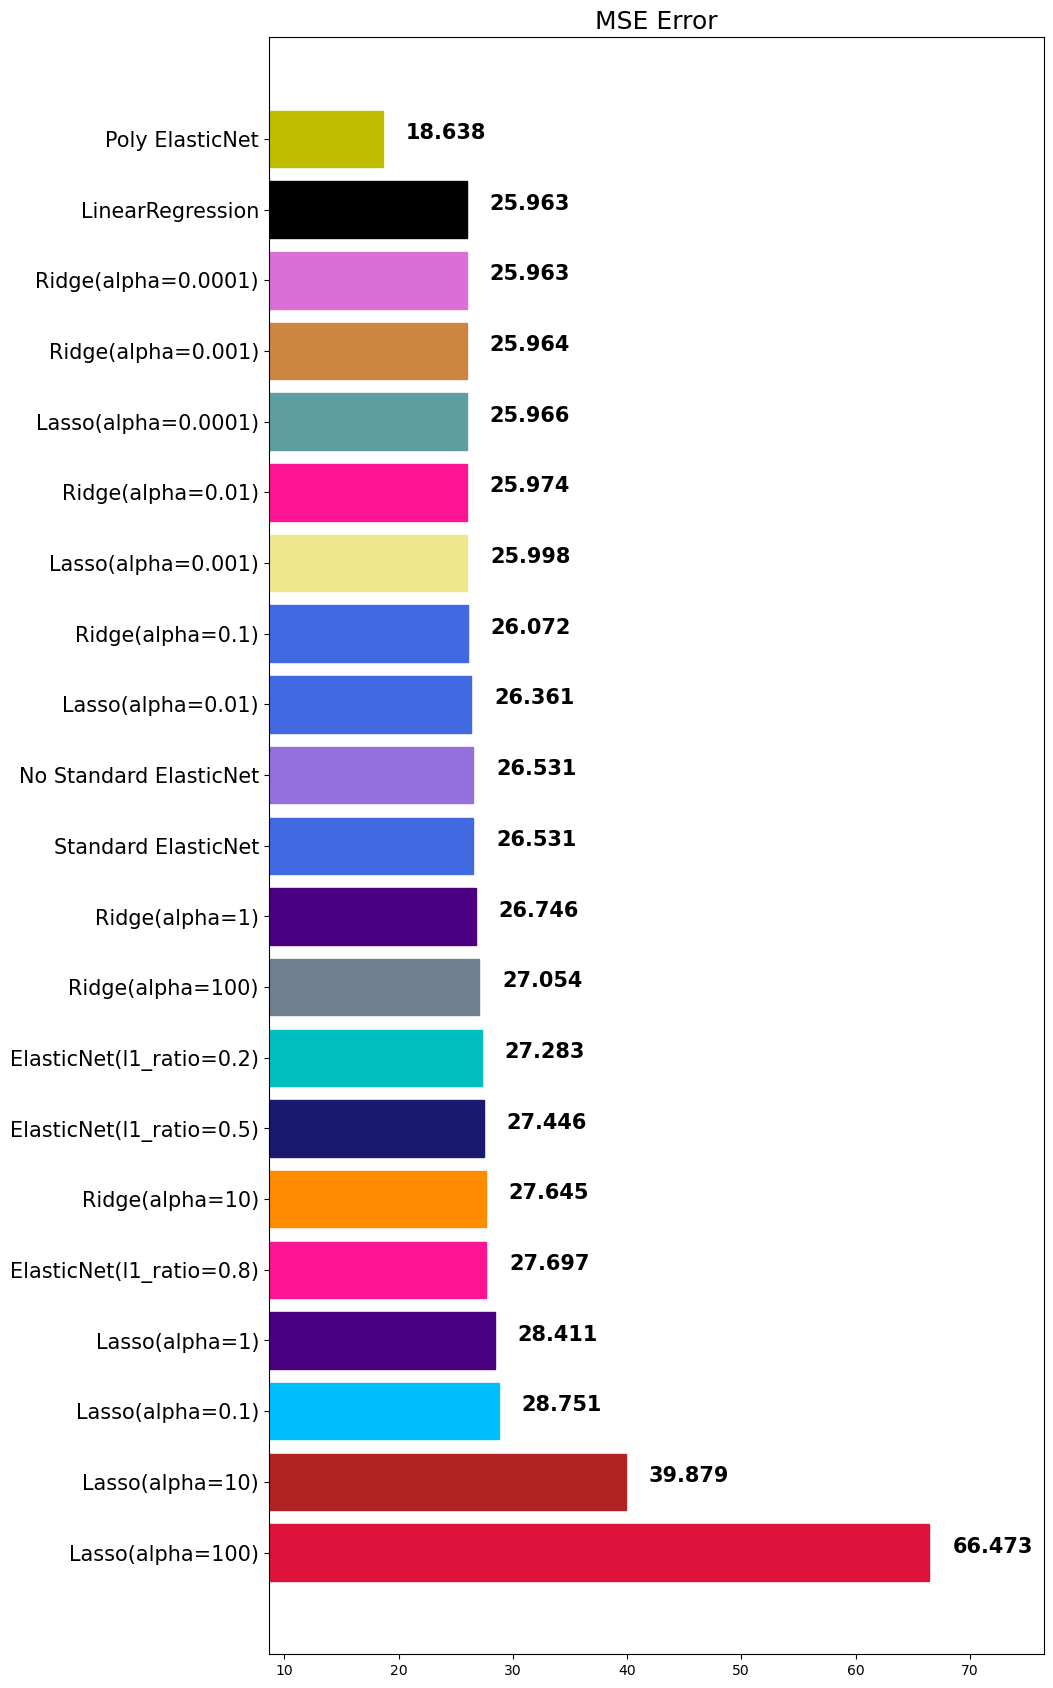

In [151]:
mse_eval('Poly ElasticNet', poly_pred, y_test)